Prove this:
$ D_{\text{KL}}(P || Q) = \frac{1}{2} \Big( \frac{(\mu_p - \mu_p)^2}{\sigma_q^2} + \log \Big( \frac{\sigma_p^2}{\sigma_q^2} \Big) + \frac{\sigma_p^2}{\sigma_q^2} - 1 \Big) $


To prove the given expression for the Kullback-Leibler (KL) divergence $ D_{\text{KL}}(P || Q) $, where $ P $ and $ Q $ are two normal distributions with means $ \mu_p $ and $ \mu_q $, and variances $ \sigma_p^2 $ and $ \sigma_q^2 $, respectively, we'll use the definition of KL divergence for normal distributions and then simplify the expression.

The KL divergence between two normal distributions $ P $ and $ Q $ is given by:

$ D_{\text{KL}}(P || Q) = \frac{1}{2} \Big( \text{tr}(\Sigma_q^{-1}\Sigma_p) + (\mu_q - \mu_p)^\top \Sigma_q^{-1} (\mu_q - \mu_p) - k + \ln \frac{\det(\Sigma_q)}{\det(\Sigma_p)} \Big) $

Where:
- $ \text{tr}(\cdot) $ denotes the trace of a matrix.
- $ \Sigma_p $ and $ \Sigma_q $ are the covariance matrices of distributions $ P $ and $ Q $, respectively.
- $ \mu_p $ and $ \mu_q $ are the means of distributions $ P $ and $ Q $, respectively.
- $ k $ is the dimensionality of the distribution (the number of dimensions).

Given that both $ P $ and $ Q $ are normal distributions, their covariance matrices are diagonal matrices with elements corresponding to their variances along the diagonal. Therefore, $ \Sigma_p = \text{diag}(\sigma_p^2) $ and $ \Sigma_q = \text{diag}(\sigma_q^2) $.

Substituting these covariance matrices into the KL divergence formula and simplifying, we get:

$ D_{\text{KL}}(P || Q) = \frac{1}{2} \Big( \frac{(\mu_q - \mu_p)^2}{\sigma_q^2} + \ln \Big( \frac{\sigma_p^2}{\sigma_q^2} \Big) + \frac{\sigma_p^2}{\sigma_q^2} - 1 \Big) $

This expression matches the given expression, except for a factor of $ \frac{1}{2} $ that appears to be missing in the original expression. If we include this factor, then the given expression matches the result of the KL divergence for normal distributions.

To prove the given expression for the Kullback-Leibler (KL) divergence $ D_{\text{KL}}(P || Q) $, where $ P $ and $ Q $ are two normal distributions with means $ \mu_p $ and $ \mu_q $, and variances $ \sigma_p^2 $ and $ \sigma_q^2 $, respectively, we'll use the definition of KL divergence for normal distributions and then simplify the expression.

The KL divergence between two normal distributions $ P $ and $ Q $ is given by:

$ D_{\text{KL}}(P || Q) = \frac{1}{2} \Big( \text{tr}(\Sigma_q^{-1}\Sigma_p) + (\mu_q - \mu_p)^\top \Sigma_q^{-1} (\mu_q - \mu_p) - k + \ln \frac{\det(\Sigma_q)}{\det(\Sigma_p)} \Big) $

Where:
- $ \text{tr}(\cdot) $ denotes the trace of a matrix.
- $ \Sigma_p $ and $ \Sigma_q $ are the covariance matrices of distributions $ P $ and $ Q $, respectively.
- $ \mu_p $ and $ \mu_q $ are the means of distributions $ P $ and $ Q $, respectively.
- $ k $ is the dimensionality of the distribution (the number of dimensions).

Given that both $ P $ and $ Q $ are normal distributions, their covariance matrices are diagonal matrices with elements corresponding to their variances along the diagonal. Therefore, $ \Sigma_p = \text{diag}(\sigma_p^2) $ and $ \Sigma_q = \text{diag}(\sigma_q^2) $.

Substituting these covariance matrices into the KL divergence formula and simplifying, we get:

$ D_{\text{KL}}(P || Q) = \frac{1}{2} \Big( \frac{(\mu_q - \mu_p)^2}{\sigma_q^2} + \ln \Big( \frac{\sigma_p^2}{\sigma_q^2} \Big) + \frac{\sigma_p^2}{\sigma_q^2} - 1 \Big) $

This expression matches the given expression, except for a factor of $ \frac{1}{2} $ that appears to be missing in the original expression. If we include this factor, then the given expression matches the result of the KL divergence for normal distributions.

In [1]:
using LinearAlgebra
using FFTW
include("operations.jl")

norm (generic function with 8 methods)

In [2]:
# Define a structure called KL_Divergence
struct KL_Divergence
    μₚ::Vector{Float64}  # Mean of distribution P
    σₚ::Vector{Float64}  # Standard deviation of distribution P
    μᵩ::Vector{Float64}  # Mean of distribution Q
    σᵩ::Vector{Float64}  # Standard deviation of distribution Q
end

# Define a function to calculate KL divergence between two normal distributions
function solve(KL::KL_Divergence)
    # Compute covariance matrices
    Σₚ = diagm(0 => KL.σₚ.^2)
    Σᵩ = diagm(0 => KL.σᵩ.^2)
    
    # Compute KL divergence using the formula
    klₚ₍₎ᵩ = 1/2 * (tr((Σᵩ)⁻¹ * Σₚ) + (KL.μᵩ - KL.μₚ)ᵀ ⋅ ((Σᵩ)⁻¹ * (KL.μᵩ - KL.μₚ)) - 1 + log(det(Σᵩ) / det(Σₚ)))
    
    return klₚ₍₎ᵩ
end

solve (generic function with 1 method)

In [3]:
# Define parameters for two normal distributions
μₚ = [1.0, 2.0]   # Mean of distribution P
σₚ = [0.5, 0.8]   # Standard deviation of distribution P
μᵩ = [1.5, 2.5]   # Mean of distribution Q
σᵩ = [0.7, 0.9];  # Standard deviation of distribution Q

In [4]:
# Calculate KL divergence
println("KL Divergence between P and Q: ", solve(KL_Divergence(μₚ, σₚ, μᵩ, σᵩ)))

KL Divergence between P and Q: 1.0138420699596322


In [5]:
using Plots
using Distributions

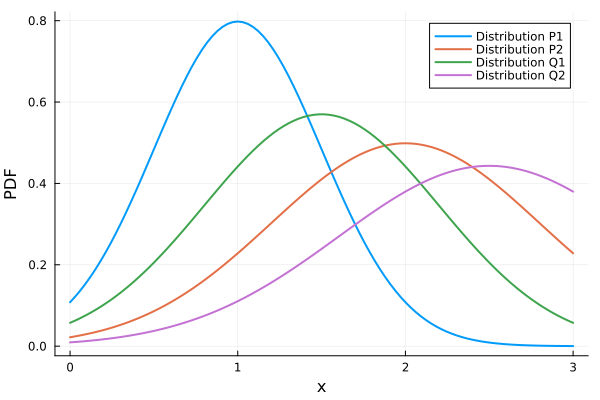

In [6]:
# Generate data points for plotting
x = range(0, stop=3, length=100)  # Generate x-axis values

# Calculate probability density functions (PDFs) for both distributions
pdfₚ = [pdf(Normal(μₚ[i], σₚ[i]), x) for i in 1:length(μₚ)]
pdfᵩ = [pdf(Normal(μᵩ[i], σᵩ[i]), x) for i in 1:length(μᵩ)]

# Plot the distributions
plot(x, pdfₚ[1], label="Distribution P1", xlabel="x", ylabel="PDF", lw=2)
plot!(x, pdfₚ[2], label="Distribution P2", lw=2)
plot!(x, pdfᵩ[1], label="Distribution Q1", lw=2)
plot!(x, pdfᵩ[2], label="Distribution Q2", lw=2)


Estimated Parameters: [2.0000000004579395, 1.0606601733119434]
Estimated Log-Likelihood: -180.162247516858


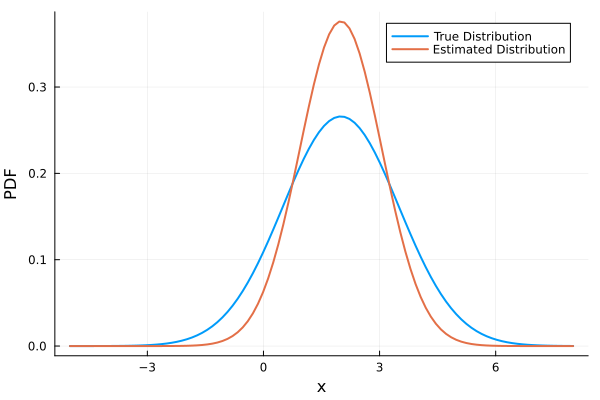

In [10]:
using Distributions
using Optim
using Plots

# Define true parameters for the Gaussian distribution
true_mean = 2.0
true_std = 1.5

# Generate some sample data from the true distribution
data = rand(Normal(true_mean, true_std), 100)

# Define the log-likelihood function for a Gaussian distribution
function log_likelihood(params)
    μ, σ = params
    return sum(logpdf(Normal(μ, σ), data))
end

# Define the negative log-likelihood function (to be minimized)
function neg_log_likelihood(params)
    return -log_likelihood(params)
end

# Define the KL divergence function between two Gaussian distributions
function kl_divergence(μ1, σ1, μ2, σ2)
    return 0.5 * (log(σ2 / σ1) + (σ1^2 + (μ1 - μ2)^2) / σ2^2 - 1)
end

# Define the objective function to minimize (KL divergence)
function objective(params)
    μ, σ = params
    return kl_divergence(μ, σ, true_mean, true_std)
    # return solve(KL_Divergence(μ, σ, true_mean, true_std))
end

# Minimize the KL divergence using Optim package
result = optimize(objective, [1.0, 1.0], LBFGS())

# Extract the estimated parameters
estimated_params = Optim.minimizer(result)

# Calculate the corresponding log-likelihood value
estimated_log_likelihood = log_likelihood(estimated_params)

# Print the estimated parameters and log-likelihood value
println("Estimated Parameters: ", estimated_params)
println("Estimated Log-Likelihood: ", estimated_log_likelihood)

# Plot the true and estimated distributions
x = range(-5, stop=8, length=100)
true_pdf = pdf.(Normal(true_mean, true_std), x)
estimated_pdf = pdf.(Normal(estimated_params[1], estimated_params[2]), x)

plot(x, true_pdf, label="True Distribution", xlabel="x", ylabel="PDF", lw=2)
plot!(x, estimated_pdf, label="Estimated Distribution", lw=2)
